# Sea Level Rise and New York City

#### *Jacob Basinger and Lucia Rossignol*

In this notebook we will be examining how population statistics have changed in New York City census tracts from 2010 to 2020, and analyzing whether vulnerabilities to sea level rise induced floods have any relationships with those changes.

## Research Question

How does the threat of sea level rise affect New York City’s population and real estate market?

## Data Sources

For this notebook we are utilizing two data sources.

1. Census Data

    The NYC OpenData portal has an excel file available that contains the 2010 and 2020 census population data, as well as columns with the population change information already calculated.  We combined this data with census tract geographies, also obtained from the NYC OpenData portal, then joined them into a workable geojson.  The full data cleaning can be seen here: https://github.com/jjbasinger/up206a_groupproject/blob/main/Group%20Assignments/week%204%20assignment%20jacob.ipynb.

2. Sea Level Rise Data

    We obtained sea level rise data from the NYC OpenData portal as well. Instead of utilizing mean high tide data, which only shows a few inches of rise and would not be very informative in a map of the entire city, we decided to use flood projections for various levels of storms (which also incorporate the rises in mean high tide). We chose to use 100 year flood and 500 year flood data because Hurricane Sandy was a 260 year storm (https://www.businessinsider.com/another-hurricane-sandy-flood-risk-hit-new-york-2016-10), therefore these visualizations will show flood events that are similar. We chose to use the 2020 projections instead of 2050s or 2100s because it is temporally sooner, and we believe people may be more likely to respond to situations that they feel are more imminent.

## Data Exploration and Analysis

In [17]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

First we imported the necessary libraries.  Then, we added the data on census tract geographies and sea level rise.

In [2]:
fullctd = gpd.read_file('../up206a_groupproject/currentdata/fullcensustractdata.geojson')
floodplain100yr = gpd.read_file('../up206a_groupproject/currentdata/Sea Level Rise Maps (2020s 100-year Floodplain).geojson')
floodplain500yr = gpd.read_file('../up206a_groupproject/currentdata/Sea Level Rise Maps (2020s 500-year Floodplain).geojson')

In [3]:
fullctd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 37 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   Neighborhood Name                                         2325 non-null   object  
 1   GeoID                                                     2325 non-null   object  
 2   Shape__Area                                               2325 non-null   float64 
 3   Shape__Length                                             2325 non-null   float64 
 4   GeoType                                                   2325 non-null   object  
 5   Borough                                                   2325 non-null   object  
 6   Population Change                                         2325 non-null   int64   
 7   Population Percent Change                                 2267 non-null   float64 
 8   

In [4]:
fullctd.sample(3)

Neighborhood Name        GeoID   Shape__Area  Shape__Length GeoType  \
973               Midwood  36047075800  2.209766e+06    6398.444339  CT2020   
401             Bay Ridge  36047005202  1.398094e+06    5190.681779  CT2020   
1401  Morningside Heights  36061020901  1.246712e+06    4807.678376  CT2020   

        Borough  Population Change  Population Percent Change  \
973    Brooklyn                189                       10.4   
401    Brooklyn                187                        7.5   
1401  Manhattan                 -8                       -0.2   

      Household Population Change  Household Population Percent Change  ...  \
973                           189                                 10.4  ...   
401                           163                                  6.6  ...   
1401                          -13                                 -0.4  ...   

      Other Race Population Percent Change  \
973                                 2100.0   
401                                  700.0   
1401                                  38.9   

      Non-Hispanic Two or More Races Population Change  \
973                                                 82   
401                                                 39   
1401                                                32   

      Non-Hispanic Two or More Races Population Percent Change  \
973                                              1640.0          
401                                                84.8          
1401                                               47.1          

      Total Change in Housing Units  Percent Change in Housing Units  \
973                              77                             11.0   
401                              -8                             -0.5   
1401                            -16                             -1.0   

      Total Change in Occupied Housing Units  \
973                                       88   
401                                       24   
1401                                      25   

      Percent Change in Occupied Housing Units  \
973                                       13.5   
401                                        1.7   
1401                                       1.7   

      Total Change in Vacant Housing Units  \
973                                    -11   
401                                    -32   
1401                                   -41   

      Percent Change in Vacant Housing Units  \
973                                    -23.4   
401                                    -28.8   
1401                                   -41.8   

                                               geometry  
973   POLYGON ((-73.94931 40.61404, -73.95027 40.613...  
401   POLYGON ((-74.03544 40.61996, -74.03571 40.619...  
1401  POLYGON ((-73.95210 40.81145, -73.95259 40.810...  

[3 rows x 37 columns]

In [27]:
fullctd['Population Percent Change'].describe()

count    2267.000000
mean       23.853639
std       251.491940
min      -100.000000
25%         1.200000
50%         6.200000
75%        11.900000
max      8983.300000
Name: Population Percent Change, dtype: float64

Just working on some basic plotting to see if it can work

<AxesSubplot:xlabel='Borough', ylabel='Population Percent Change'>

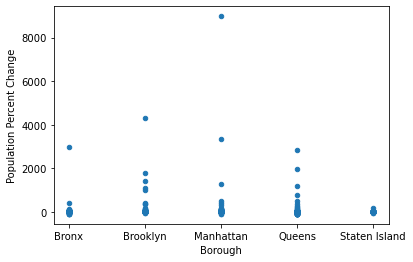

In [28]:
fullctd.plot.scatter(x='Borough', y='Population Percent Change')

Trying to make a bar chart to visualize population change

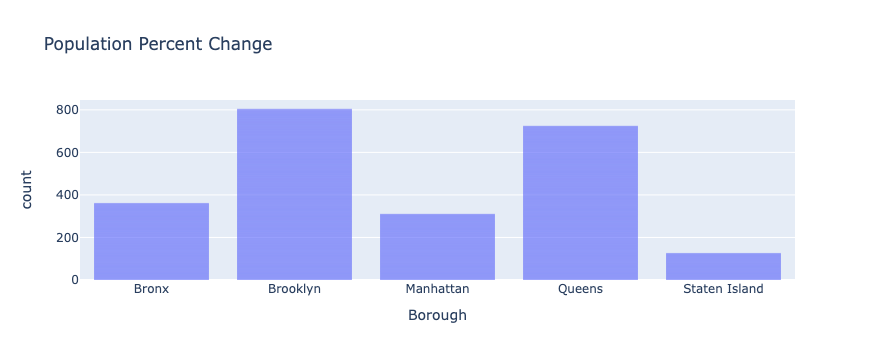

In [18]:
fig = px.bar(fullctd,
       x='Borough',
       title='Population Percent Change'
      )

fig.update_traces(marker_line_width=0)

fig.show()

Improving the labels

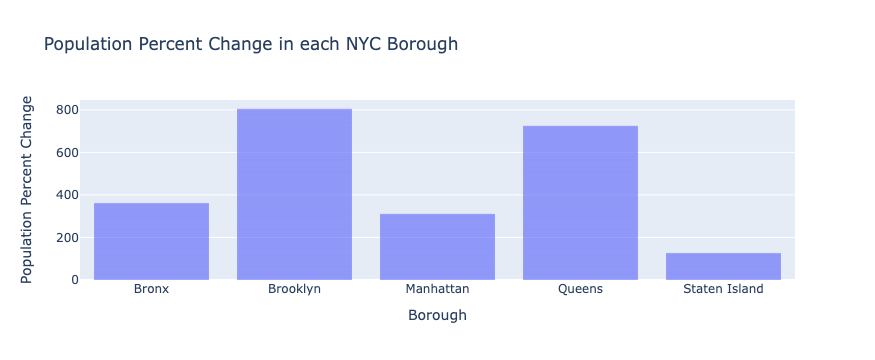

In [38]:
fig = px.bar(
        fullctd,
        x='Borough',
        title='Population Percent Change in each NYC Borough',
        labels={
            'Borough':'Borough',
            'count':'Population Percent Change'
        }
)

fig.update_traces(marker_line_width=0)

fig.show()

Adding new labels

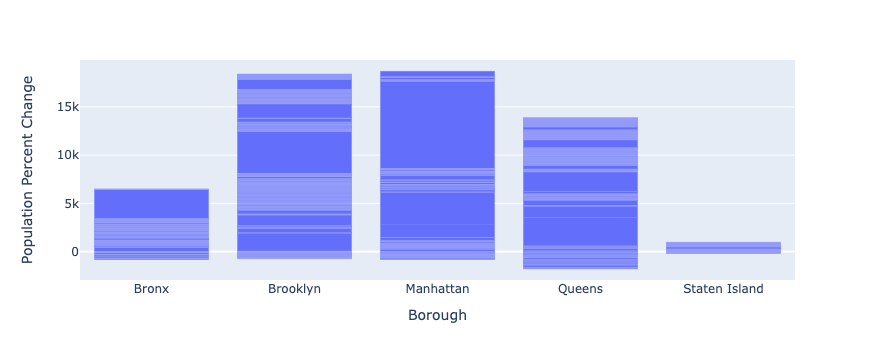

In [39]:
fig = px.bar(fullctd,
       x='Borough',
       y='Population Percent Change'
)

fig.update_traces(marker_line_width=0)

fig.show()

Trying to add colours to visualize race

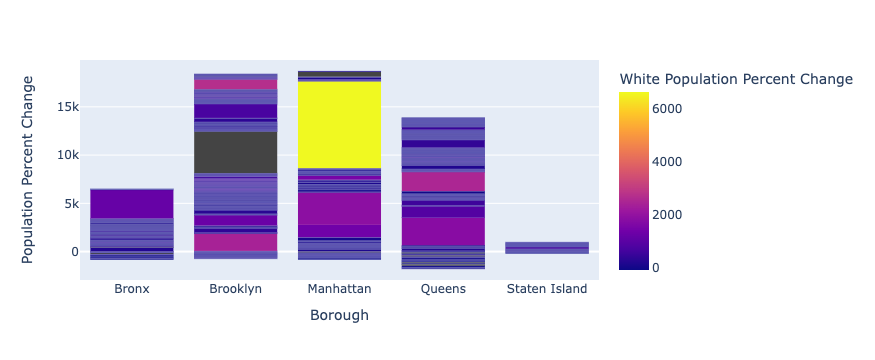

In [40]:
fig = px.bar(fullctd,
       x='Borough',
       y='Population Percent Change',
       color='White Population Percent Change' 
)

fig.update_traces(marker_line_width=0)
fig.show()

## Map Visualizations

Below, we plotted the census tracts that have decreased in population since 2010, with the yellow, orange, and red colors representing different percentages of population change.  Since we are mostly concerned with whether or not people are moving out of the areas that are most vulnerable to sea level rise, we decided to only plot those census tracts where the percentage population change was less than zero. We then layered the 100 year floodplain scenario and the 500 year floodplain scenario on top in side by side subplots to see if there is any correlation.

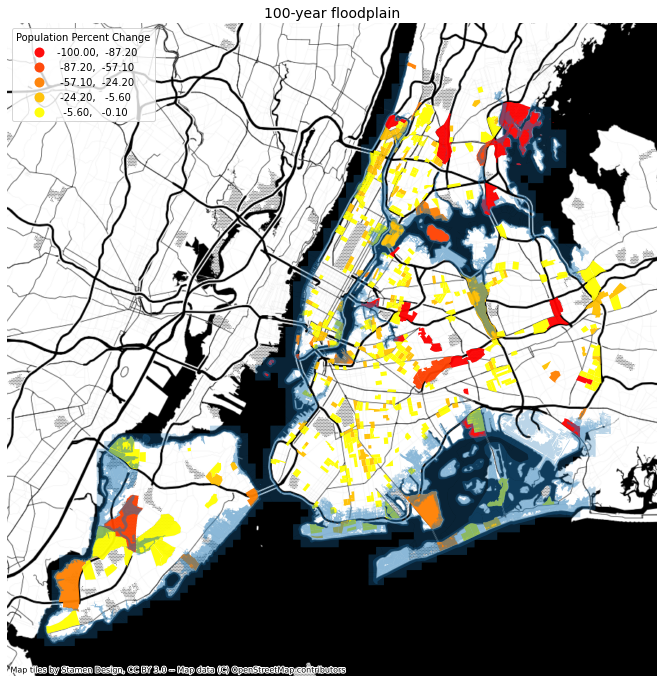

In [5]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax1 = ax

fullctd[fullctd['Population Percent Change'] < 0].to_crs(epsg=3857).plot(
        column='Population Percent Change',
        ax=ax1,
        cmap='autumn',
        scheme='natural_breaks',
        legend=True,
        legend_kwds={'loc': 'upper left', 'title': 'Population Percent Change'},
        alpha=0.95)

floodplain100yr.to_crs(epsg=3857).plot(
        ax=ax1,
        alpha=0.3)

ax1.axis('off')
    
ax1.set_title('100-year floodplain',fontsize=14)

ctx.add_basemap(ax1, source=ctx.providers.Stamen.TonerBackground)

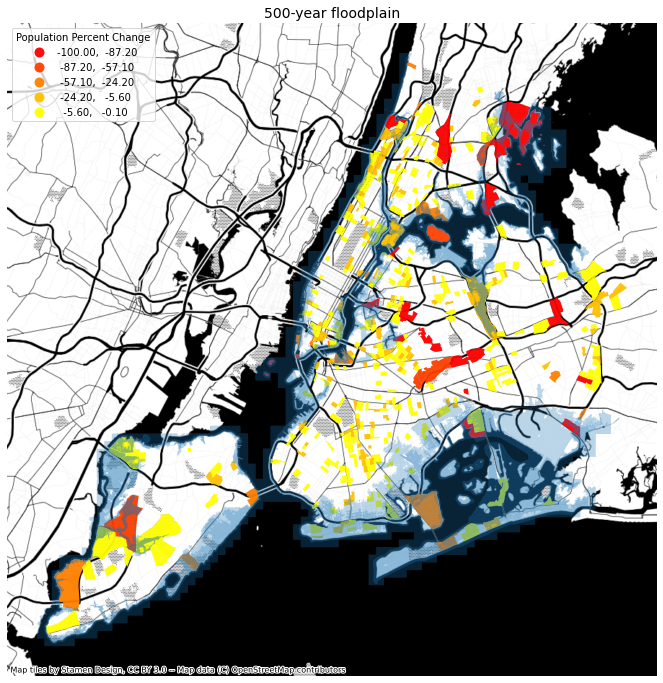

In [6]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax1 = ax

fullctd[fullctd['Population Percent Change'] < 0].to_crs(epsg=3857).plot(
        column='Population Percent Change',
        ax=ax1,
        cmap='autumn',
        scheme='natural_breaks',
        legend=True,
        legend_kwds={'loc': 'upper left', 'title': 'Population Percent Change'},
        alpha=0.95)

floodplain500yr.to_crs(epsg=3857).plot(
        ax=ax1,
        alpha=0.3)

ax1.axis('off')
    
ax1.set_title('500-year floodplain',fontsize=14)

ctx.add_basemap(ax1, source=ctx.providers.Stamen.TonerBackground)

For comparison's sake, below see a map of census tracts with increased population and the 100-year floodplain overlaid.

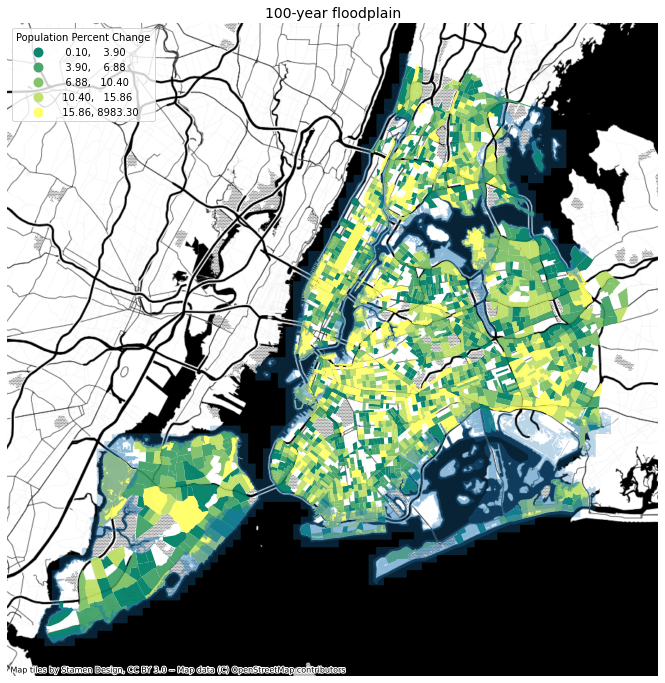

In [7]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax1 = ax

fullctd[fullctd['Population Percent Change'] > 0].to_crs(epsg=3857).plot(
        column='Population Percent Change',
        ax=ax1,
        cmap='summer',
        scheme='quantiles',
        legend=True,
        legend_kwds={'loc': 'upper left', 'title': 'Population Percent Change'},
        alpha=0.95)

floodplain100yr.to_crs(epsg=3857).plot(
        ax=ax1,
        alpha=0.3)

ax1.axis('off')
    
ax1.set_title('100-year floodplain',fontsize=14)

ctx.add_basemap(ax1, source=ctx.providers.Stamen.TonerBackground)

As you can see in the maps outputted above, it does not appear that there is a correlation between projected sea level rise and population change.  In other words, the areas that are most vulnerable to sea level rise and flood events are not experiencing the most population loss.  While there are census tracts that have negative population change, most of the areas with projected flooding are not losing population.  It appears that there are other confounding variables that are likely having an impact on where populations are changing.

### Interactive Map

The following cells are from where we created the interactive map through KeplerGL.  The code ran and produced the maps that are in our presentation, but we decided to not have them run in this file due to memory constraints.

We made two interactive maps: 
- a three-dimensional map that shows the change in housing units in each census tract, represented by the height of each tract (https://github.com/jjbasinger/up206a-jacob/blob/main/nyc_housing_units.html)
- a two dimensional map with a choropleth of the change in total occupied housing units in each census tract with toggleable layers to show both the 100 year and 500 year flooplain on top (https://github.com/jjbasinger/up206a-jacob/blob/main/nyc_housing_and_flooding.html)

In [8]:
#from keplergl import KeplerGl

#map = KeplerGl(height=600,width=800)

#map.add_data(data=fullctd, name='census tracts')

#map.add_data(data=floodplain500yr, name='500 yr floodplain')

#map.add_data(data=floodplain100yr, name='100 yr floodplain')

#map

In [9]:
#map.save_to_html(file_name='nyc_occupancy_and_flooding.html',read_only=True)

Once again, it does not appear that there is a strong relationship between the projected flood levels and the census tract data.  However, there may be a small correlation between flooding and the change in total occupied housing units.  This could be because of storm damage caused by Hurricane Sandy. I added a non-interactive map below to illustrate this point just in case the Kepler html map does not load.

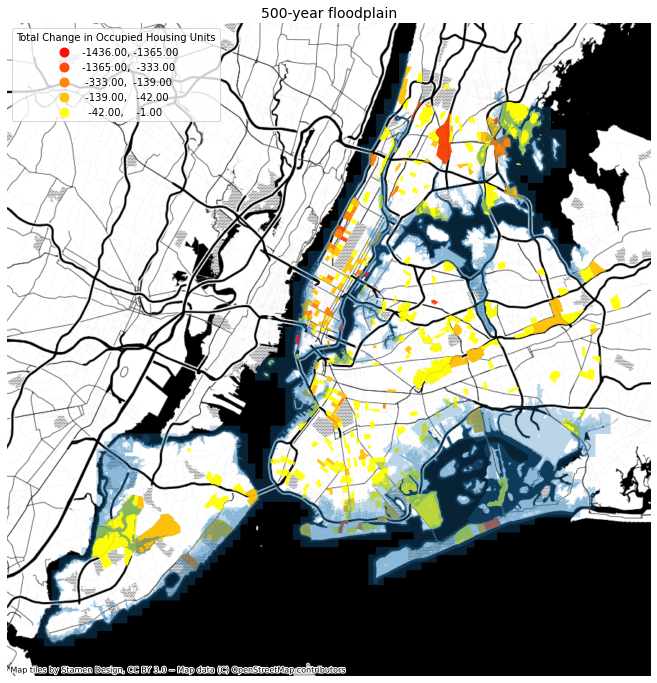

In [10]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax1 = ax

fullctd[fullctd['Total Change in Occupied Housing Units'] < 0].to_crs(epsg=3857).plot(
        column='Total Change in Occupied Housing Units',
        ax=ax1,
        cmap='autumn',
        scheme='natural_breaks',
        legend=True,
        legend_kwds={'loc': 'upper left', 'title': 'Total Change in Occupied Housing Units'},
        alpha=0.95)

floodplain500yr.to_crs(epsg=3857).plot(
        ax=ax1,
        alpha=0.3)

ax1.axis('off')
    
ax1.set_title('500-year floodplain',fontsize=14)

ctx.add_basemap(ax1, source=ctx.providers.Stamen.TonerBackground)

However, any relationships that we have explored up to this point do not appear to be significant.

### Extra Map Stuff

I decided to take this opportunity to work on the defining functions.  Below I created a function that takes inputs and creates a choropleth map with another layer on top of it, and with a base map.  While the choropleth cannot be customized very much in this function, I believe it can be useful for quick analyses of  relationships between data categories and sea level rise.

In [11]:
def layered_choropleth_map(dataset, choropleth_category, color, choropleth_scheme, top_layer, title):
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax1 = ax

    dataset.to_crs(epsg=3857).plot(
        column=choropleth_category,
        ax=ax1,
        cmap=color,
        scheme=choropleth_scheme,
        legend=True,
        legend_kwds={'loc': 'upper left', 'title': choropleth_category},
        alpha=0.95)

    top_layer.to_crs(epsg=3857).plot(
        ax=ax1,
        alpha=0.3)

    ax1.axis('off')
    
    ax1.set_title(title, fontsize=14)

    ctx.add_basemap(ax1, source=ctx.providers.Stamen.TonerBackground)

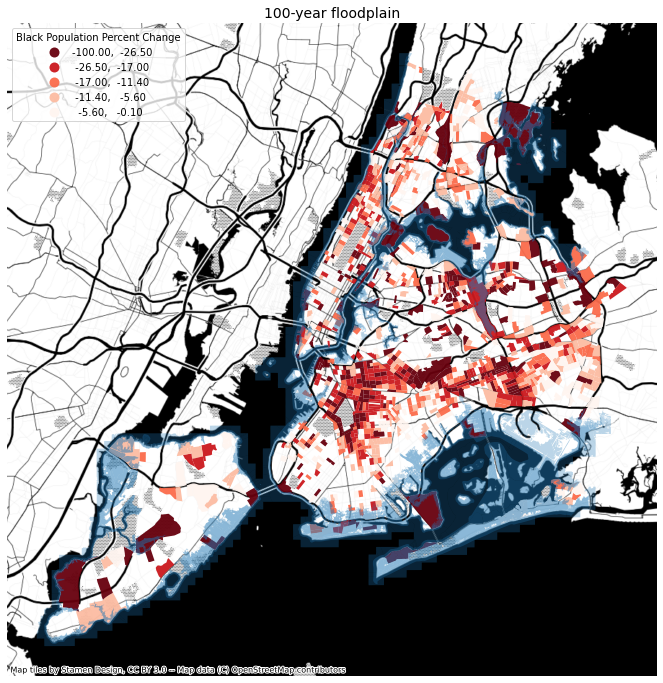

In [13]:
layered_choropleth_map(fullctd[fullctd['Black Population Percent Change'] < 0], 'Black Population Percent Change', 'Reds_r', 'quantiles', floodplain100yr, '100-year floodplain')

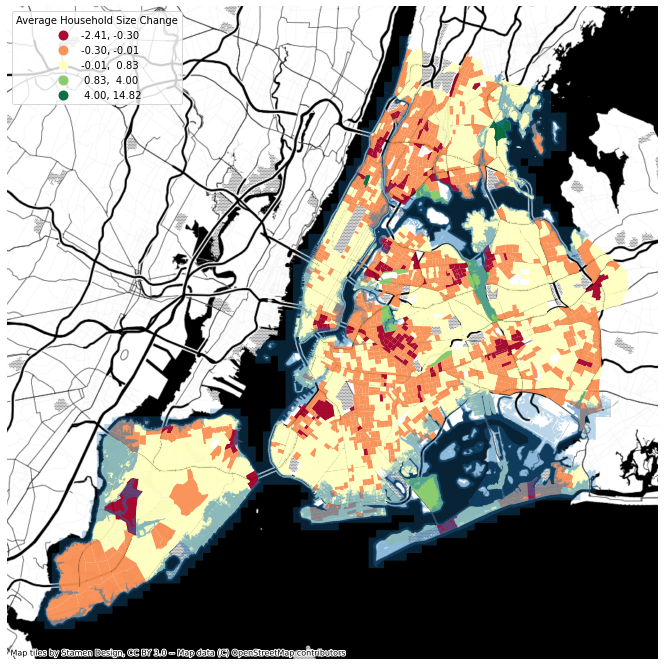

In [14]:
layered_choropleth_map(fullctd, 'Average Household Size Change', 'RdYlGn', 'natural_breaks', floodplain100yr, '')

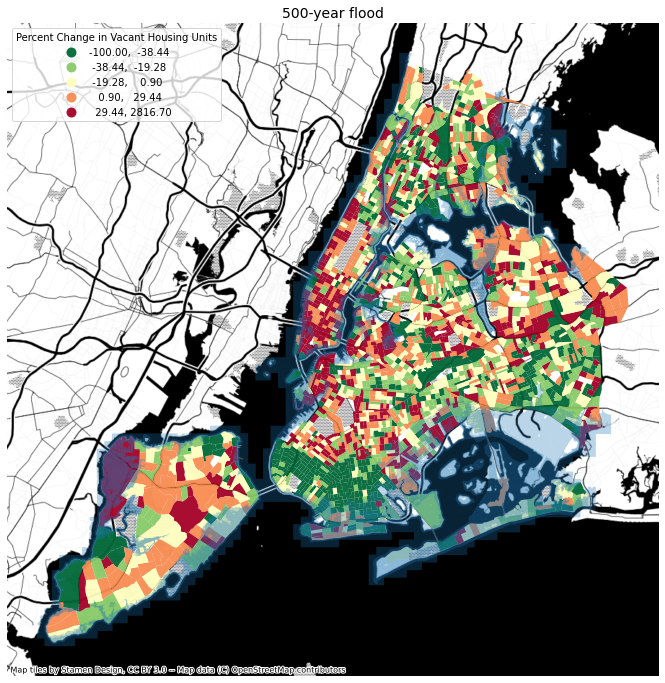

In [15]:
layered_choropleth_map(fullctd, 'Percent Change in Vacant Housing Units', 'RdYlGn_r', 'quantiles', floodplain500yr, '500-year flood')

I hope to further expand on defining functions as our project progresses. We should be able to use this function with the housing or insurance data (so long as they create choropleth maps) to examine their relationships with sea level rise in the next stage of our project.

## Conclusion

In conclusion, so far we have worked with both temporal census data and sea level rise flood data.  When comparing the two, we were unable to see any clear relationships between those locations that are more vulnerable to flooding and changes in population characteristics.  Going forward, we plan to integrate financial housing data into this analysis.

## Division of Labor
Jacob: Project Proposal Update, data collection and cleaning, "Data Sources" section, "Map Visualizations" Section

Lucia: "Data Exploration and Analysis" section